###### About Project 
In this project we are using vehicle dataset from kaggle. The dataset contains data of used car and has attributes such as\
1.name : Name of the car  
2.year  : year in which car was sold \
3.selling_price : Price in which car was sold \
4.km_driven : Kilomiter driven of car after being sold \
5.fuel :  Type of fuel used by car.\
6.seller_type : Type of seller \
7.transmission : Trasmission system of car.\
8.Owner : First Owner, Second Owner and Third Owner \

With help of this project we are trying to implement  Exploratory Data Analysis and Data Mining Algorithm in practice which we have used in COMP 408

 
##### Reference : 
1. Kaggle : For Dataset
2.Wikipedia : For Terms associated in Project

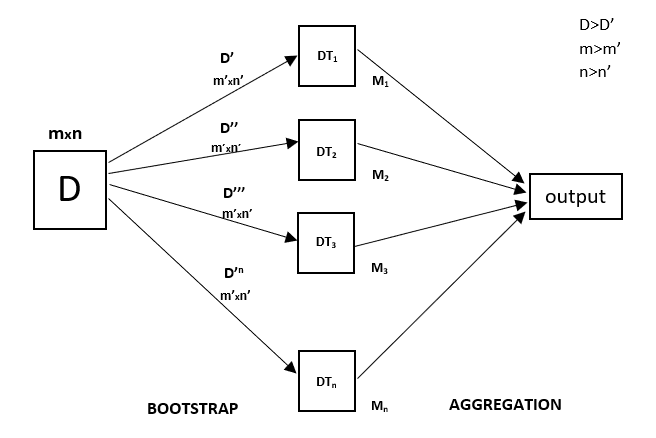

In [48]:
from IPython.display import Image
Image("presentation.png")

#### Importing required Libraries 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Exploratory Data Analysis

In [3]:
data = pd.read_csv("cardataset.csv")
data.sample(5)

,Unnamed: 0,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
291,291,brio,2015,5.40,6.10,31427,Petrol,Dealer,Manual,0
198,198,Bajaj Discover 125,2011,0.15,0.57,35000,Petrol,Individual,Manual,1
213,213,i20,2011,2.90,6.79,31604,Petrol,Dealer,Manual,0
49,49,ciaz,2017,7.75,9.29,37000,Petrol,Dealer,Automatic,0
37,37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0


In [4]:
for features in ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']:
    print(features,data[features].unique())

Fuel_Type ['Petrol' 'Diesel' 'CNG']
Seller_Type ['Dealer' 'Individual']
Transmission ['Manual' 'Automatic']
Owner [0 1 3]


In [5]:
data.shape

(301, 10)

In [6]:
data.columns

Index(['Unnamed: 0', 'Car_Name', 'Year', 'Selling_Price', 'Present_Price',
       'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
data.drop('Unnamed: 0',axis = 1,inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


We have outliers in our datacolum of Selling_Price, Present_Price and Kms_Driven

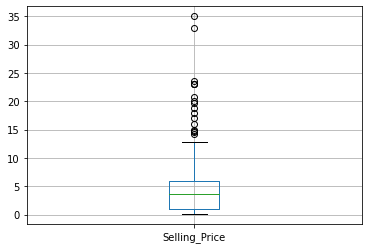

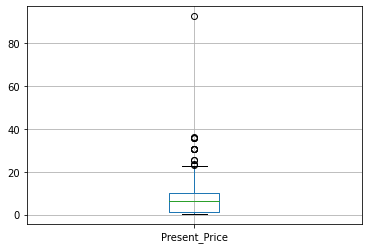

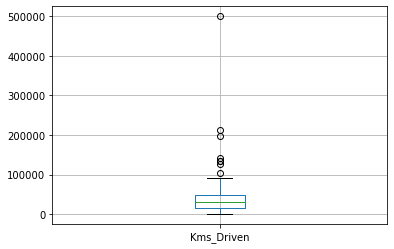

In [10]:
for feature in ['Selling_Price','Present_Price',"Kms_Driven"]:
    data.boxplot(column = feature)
    plt.show()

As stated the box plots shows we have outliers in these columns. We can also see that these data's have skewed distributions.Let's plot their skewness

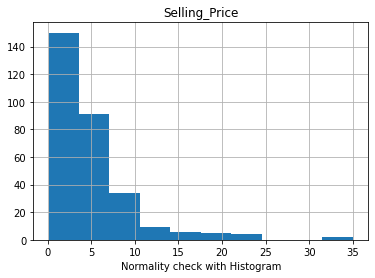

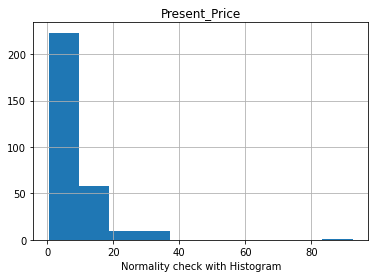

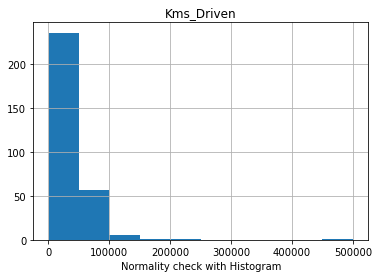

In [11]:
for feature in ['Selling_Price','Present_Price',"Kms_Driven"]:
    data.hist(column = feature)
    plt.xlabel("Normality check with Histogram")
    plt.show()

These characteristics being skwed we are using Inter Quartile Range (IQR) to solve our outlier problem

In [12]:
#Creating function for IQR and list storing indices containing outliers
def outliers(dataframe,features):
    Q1 = dataframe[features].quantile(0.25)
    Q3 = dataframe[features].quantile(0.75)
    IQR = Q3 -Q1
    
    lower_bound = Q1 - 1.5* IQR
    upper_bound = Q3 + 1.5*IQR 
    
    ls = dataframe.index[ (dataframe[features] < lower_bound) | (dataframe[features] > upper_bound)]
    return ls

In [13]:
# Creating empty list to store indices of multiple columns
index_list = []
for features in ['Selling_Price','Present_Price',"Kms_Driven"]:
    index_list.extend(outliers(data,features))

In [14]:
#Remove Function which return data frame with no outliers
def remove(dataframe,ls):
    ls = sorted(set(ls))
    dataframe = dataframe.drop(ls)
    return dataframe

In [15]:
cleaned_data = remove(data,index_list)

In [16]:
print('Shape of Data with outliers',data.shape,"Shape of Data withour outliers",cleaned_data.shape)

Shape of Data with outliers (301, 9) Shape of Data withour outliers (278, 9)


In [17]:
cleaned_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,278.000000,278.000000,278.000000,278.000000,278.000000
mean,2013.715827,3.761187,6.132662,32497.741007,0.035971
std,2.703488,3.058118,4.990818,21122.209333,0.186554
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.757500,1.005000,15000.000000,0.000000
50%,2014.000000,3.350000,5.885000,31427.000000,0.000000
75%,2016.000000,5.612500,9.400000,45655.000000,0.000000
max,2018.000000,12.900000,22.830000,92233.000000,1.000000


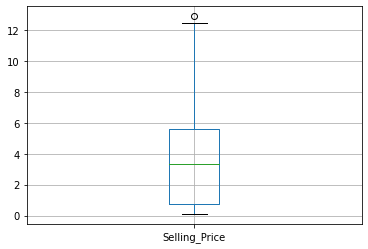

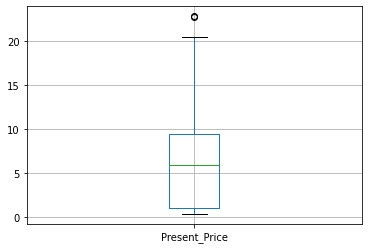

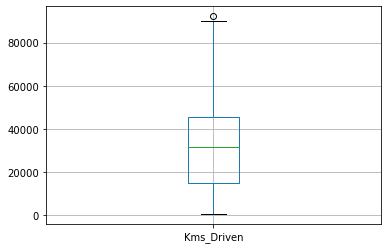

In [18]:
for feature in ['Selling_Price','Present_Price',"Kms_Driven"]:
    cleaned_data.boxplot(column = feature)
    plt.show()

In [19]:
cleaned_data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [20]:
for features in ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']:
    print(features,cleaned_data[features].unique())

Fuel_Type ['Petrol' 'Diesel' 'CNG']
Seller_Type ['Dealer' 'Individual']
Transmission ['Manual' 'Automatic']
Owner [0 1]


In [21]:
cleaned_data.Fuel_Type.value_counts()

Petrol    231
Diesel     45
CNG         2
Name: Fuel_Type, dtype: int64

In [22]:
cleaned_data.Seller_Type.value_counts()

Dealer        177
Individual    101
Name: Seller_Type, dtype: int64

In [23]:
from datetime import date
cleaned_data['No_of_Years'] =date.today().year - cleaned_data['Year']

In [24]:
cleaned_data.drop("Year",axis = 1,inplace = True)

In [25]:
cleaned_data.sample(5)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Years
210,i10,3.10,4.60,35775,Petrol,Dealer,Manual,0,9
27,swift,6.00,6.49,16200,Petrol,Individual,Manual,0,4
204,eon,2.75,4.43,28282,Petrol,Dealer,Manual,0,6
228,verna,4.95,9.40,60000,Diesel,Dealer,Manual,0,9
22,sx4,4.40,8.01,50000,Petrol,Dealer,Automatic,0,10


### Some Visualizations

C:\Users\SAMSUNG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


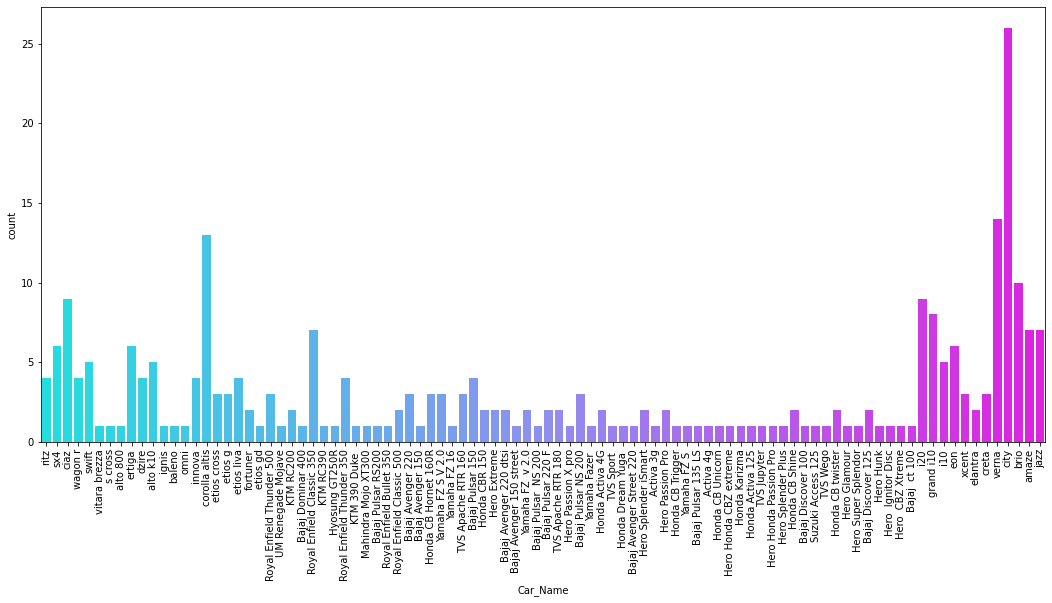

In [26]:
plt.figure(figsize=(18,8))
sns.countplot(cleaned_data['Car_Name'], palette='cool')
plt.xticks(rotation=90)
plt.show()

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'No_of_Years'], dtype='object')


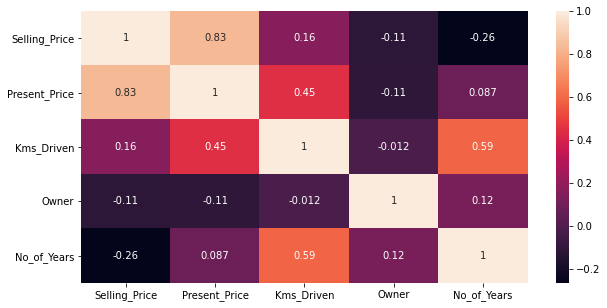

In [27]:
#get correlations of each features in dataset
corrmat = cleaned_data.corr()
top_corr_features = corrmat.index
print(top_corr_features)
plt.figure(figsize=(10,5))
#plot heat map
g=sns.heatmap(cleaned_data[top_corr_features].corr(),annot=True)

We are going to predict the Selling Price of the car with help of other parameters , here we also have categorical instances i.e. Fuel_type , Seller_Type and Tranmission. We should change them into numerical variable which can be done with help of one Label Encoder

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dfle =  cleaned_data
dfle.Seller_Type = le.fit_transform(dfle.Seller_Type)
dfle.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Years
0,ritz,3.35,5.59,27000,Petrol,0,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,0,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,0,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,0,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,0,Manual,0,7


In [29]:
dfle.Transmission , dfle.Fuel_Type = le.fit_transform(dfle.Transmission) , le.fit_transform(dfle.Fuel_Type)

In [30]:
dfle.sample(6)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Years
281,city,2.10,7.60,50456,2,0,1,0,15
55,corolla altis,3.60,15.04,70000,2,0,0,0,12
5,vitara brezza,9.25,9.83,2071,1,0,1,0,3
32,swift,4.95,7.49,39000,1,0,1,0,7
83,innova,12.50,13.46,38000,1,0,1,0,6
282,city,8.25,14.00,63000,1,0,1,0,7


In [31]:
dfle.drop("Car_Name",axis = 1, inplace = True)

In [32]:
dfle.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'No_of_Years'],
      dtype='object')

In [33]:
for features in ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']:
    print(features,dfle[features].unique())

Fuel_Type [2 1 0]
Seller_Type [0 1]
Transmission [1 0]
Owner [0 1]


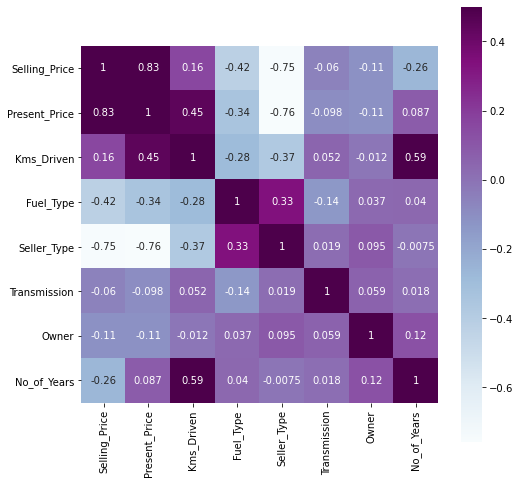

In [34]:
#correlation
plt.figure(figsize=(8,8))
sns.heatmap(dfle.corr(), vmax=.5, square=True, cmap='BuPu', annot=True);

## Modeling 

In [35]:
from sklearn.model_selection import train_test_split

X=dfle.drop('Present_Price', axis=1)
y=dfle['Present_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [36]:
#model
from sklearn.ensemble import RandomForestRegressor


reg = RandomForestRegressor()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [37]:
y_pred

array([ 4.94   ,  7.2212 ,  4.21   ,  0.92666,  9.7639 ,  1.6886 ,
        0.79576, 10.9862 ,  8.4397 ,  7.0757 ,  1.8715 , 13.3648 ,
        3.9838 ,  4.5459 ,  7.2097 ,  0.58758,  0.55046, 12.6399 ,
        1.00492, 13.4719 ,  6.4152 ,  9.5009 ,  0.82594,  0.5799 ,
        6.5748 ,  6.7423 , 11.3033 ,  0.97672,  0.88472,  7.0754 ,
        0.70792, 11.2297 ,  7.3975 , 10.7304 ,  0.5477 ,  9.3207 ,
        0.5358 ,  6.7381 ,  5.7874 ,  6.0895 ,  0.52486,  1.3567 ,
        0.5469 ,  0.83094,  1.01038, 16.7492 , 11.7827 ,  6.255  ,
        6.6717 ,  8.3381 ,  6.9091 ,  8.4694 ,  1.5254 ,  5.9962 ,
        0.64068,  0.73078])

## Prediction 

In [38]:
a = input("Enter amount in which you bought car ? ")
b = input("Enter Kilometer Driven ")
c = input("Enter Fuel Type of your car ")
d = input("Enter Seller Type ")
e = input("Enter Transmission Type ")
f = input("Enter Ownership ")
g = input("Enter No of Years you have used this car ")


Enter amount in which you bought car ? 0.20
Enter Kilometer Driven 25000
Enter Fuel Type of your car 0
Enter Seller Type 1
Enter Transmission Type 2
Enter Ownership 0
Enter No of Years you have used this car 25


In [39]:
prediction = reg.predict([[a,b,c,d,e,f,g]])
print("Your Present  Price of the car should be ",prediction,"lakhs")

Your Present  Price of the car should be  [0.62821] lakhs


### Model Evaluation 

Text(0, 0.5, 'Predicting Dataset')

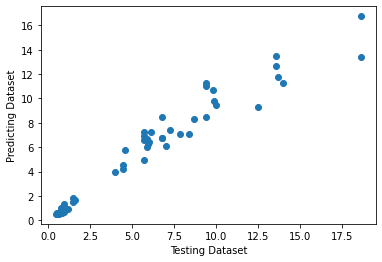

In [40]:
plt.scatter(y_test,y_pred)
plt.xlabel('Testing Dataset')
plt.ylabel('Predicting Dataset')

In [41]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.6906842857142869
MSE: 1.3730667245142887
RMSE: 1.171779298551689


In [42]:
reg.score(X_test,y_test)

0.9400492554787943